In [2]:
# import
import pandas as pd
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import seaborn as sns
print('Setup Complete')

Setup Complete


In [3]:
# Extract Data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRisnQjodySbp6-XXPGhdsVMp2stg_gyuxw42pP41tuxeic63IARau6bV1TgjLiw_ciAWsTO5LarPqT/pub?output=xlsx"
xls_file, _ = urlretrieve(url)

In [4]:
# Read excel 
df = pd.read_excel(xls_file, sheet_name="Data")
df.head()


,Status,Outbound Sequence,Vessel name,IMO,Departure port,Country,Commodity,Tonnage,Departure,Inspection İstanbul,Income group,Flag,World Bank region,UN region,Development category
0,Outbound,805.0,ZHENG KAI,9593787.0,Yuzhny/Pivdennyi,China,Barley,35548.0,2023-03-10 22:00:00,NaT,upper-middle-income,Panama,East Asia & Pacific,Asia-Pacific,developing
1,Outbound +,805.0,ZHENG KAI,9593787.0,Yuzhny/Pivdennyi,China,Corn,32155.0,2023-03-10 22:00:00,NaT,upper-middle-income,Panama,East Asia & Pacific,Asia-Pacific,developing
2,Outbound,804.0,INTEGRALE,9673202.0,Yuzhny/Pivdennyi,China,Corn,66970.0,2023-03-10 22:00:00,NaT,upper-middle-income,Liberia,East Asia & Pacific,Asia-Pacific,developing
3,Outbound,803.0,LADY LAGUNA,9354040.0,Chornomorsk,Libya,Barley,15500.0,2023-03-09 22:00:00,NaT,upper-middle-income,Barbados,Middle East & North Africa,Africa,developing
4,Outbound,802.0,LAAX,9512355.0,Odesa,The Netherlands,Corn,29800.0,2023-03-09 22:00:00,NaT,high-income,Marshall Islands,Europe & Central Asia,Western Europe and Others,developed


In [4]:
# Check the shape of data
df.shape

(887, 15)

In [5]:
# Include only grains 
col_grains = ["Corn","Wheat", "Barley"]
df_ = df.loc[df["Commodity"].isin(col_grains)]
df_

,Status,Outbound Sequence,Vessel name,IMO,Departure port,Country,Commodity,Tonnage,Departure,Inspection İstanbul,Income group,Flag,World Bank region,UN region,Development category
0,Outbound,805.0,ZHENG KAI,9593787.0,Yuzhny/Pivdennyi,China,Barley,35548.0,2023-03-10 22:00:00,NaT,upper-middle-income,Panama,East Asia & Pacific,Asia-Pacific,developing
1,Outbound +,805.0,ZHENG KAI,9593787.0,Yuzhny/Pivdennyi,China,Corn,32155.0,2023-03-10 22:00:00,NaT,upper-middle-income,Panama,East Asia & Pacific,Asia-Pacific,developing
2,Outbound,804.0,INTEGRALE,9673202.0,Yuzhny/Pivdennyi,China,Corn,66970.0,2023-03-10 22:00:00,NaT,upper-middle-income,Liberia,East Asia & Pacific,Asia-Pacific,developing
3,Outbound,803.0,LADY LAGUNA,9354040.0,Chornomorsk,Libya,Barley,15500.0,2023-03-09 22:00:00,NaT,upper-middle-income,Barbados,Middle East & North Africa,Africa,developing
4,Outbound,802.0,LAAX,9512355.0,Odesa,The Netherlands,Corn,29800.0,2023-03-09 22:00:00,NaT,high-income,Marshall Islands,Europe & Central Asia,Western Europe and Others,developed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,Outbound,4.0,POLARNET,9758961.0,Chornomorsk,Türkiye,Corn,12000.0,2022-08-04 23:00:00,2022-08-06 23:00:00,upper-middle-income,Türkiye,Europe & Central Asia,Asia-Pacific,developing
908,Outbound,3.0,ROJEN,9754927.0,Chornomorsk,Italy,Corn,13041.0,2022-08-04 23:00:00,2022-08-06 23:00:00,high-income,Malta,Europe & Central Asia,Western Europe and Others,developed
909,Outbound,2.0,NAVI STAR,9590979.0,Odesa,Ireland,Corn,33000.0,2022-08-04 23:00:00,2022-08-05 23:00:00,high-income,Panama,Europe & Central Asia,Western Europe and Others,developed
910,Outbound,1.0,RAZONI,9086526.0,Odesa,Türkiye,Corn,1527.0,2022-07-31 23:00:00,2022-08-02 23:00:00,upper-middle-income,Sierra Leone,Europe & Central Asia,Asia-Pacific,developing


In [6]:
# Check unique values
df["Commodity"].unique()

array(['Barley', 'Corn', 'Rapeseed', 'Soya beans', 'Sunflower seeds',
       'Sunflower oil', 'Wheat', 'Sunflower meal', 'Sunflower seed',
       'Peas', 'Vegetable oil', 'Soya oil', 'Canola', 'Rapeseed meal',
       'Sunflower pellets', 'Mixed', 'Wheat bran pellets',
       'Sugar beet pellets'], dtype=object)

In [7]:
# Create a pivot table, showing how many tons of each commodity (rows) have left each port (columns).
df_depart_port = pd.pivot_table(df_, values="Tonnage", columns=["Departure port", "Commodity"], aggfunc="sum").stack()
df_depart_port

Departure port     Chornomorsk      Odesa  Yuzhny/Pivdennyi
        Commodity                                          
Tonnage Barley       244381.00   450941.0         350803.36
        Corn        4239304.99  2932682.0        4588242.00
        Wheat       2140583.00  2408473.0        2040837.00

In [8]:
# Create a pivot table, showing how many tons of each commodity (columns) were going to each destination country (rows).
df_dest_country = pd.pivot_table(
    df_, values="Tonnage", columns=["Country", "Commodity"], aggfunc="sum"
).stack()
df_dest_country


Country            Afghanistan   Algeria  Bangladesh   Belgium      China  \
        Commodity                                                           
Tonnage Barley             NaN       NaN         NaN       NaN   161592.0   
        Corn               NaN       NaN         NaN  220483.0  3694733.0   
        Wheat         130869.0  181770.0    655422.0   33000.0        NaN   

Country            Djibouti     Egypt  Ethiopia   Germany   Greece  ...  \
        Commodity                                                   ...   
Tonnage Barley          NaN       NaN       NaN       NaN  18076.0  ...   
        Corn            NaN  529380.0       NaN  194260.0  46346.0  ...   
        Wheat         541.0  233700.0  202759.0       NaN  57706.0  ...   

Country                 Spain  Sri Lanka    Sudan  Thailand  The Netherlands  \
        Commodity                                                              
Tonnage Barley      365282.36        NaN      NaN       NaN              NaN   
        Corn       1896654.00        NaN      NaN       NaN         960160.0   
        Wheat      1615453.00   103768.0  65340.0   68250.0              NaN   

Country             Tunisia     Türkiye  United Kingdom  Viet Nam     Yemen  
        Commodity                                                            
Tonnage Barley      99300.0   230187.00             NaN       NaN       NaN  
        Corn       229948.0   721397.99         32988.0       NaN       NaN  
        Wheat      222150.0  1134600.00             NaN  116789.0  205618.0  

[3 rows x 36 columns]

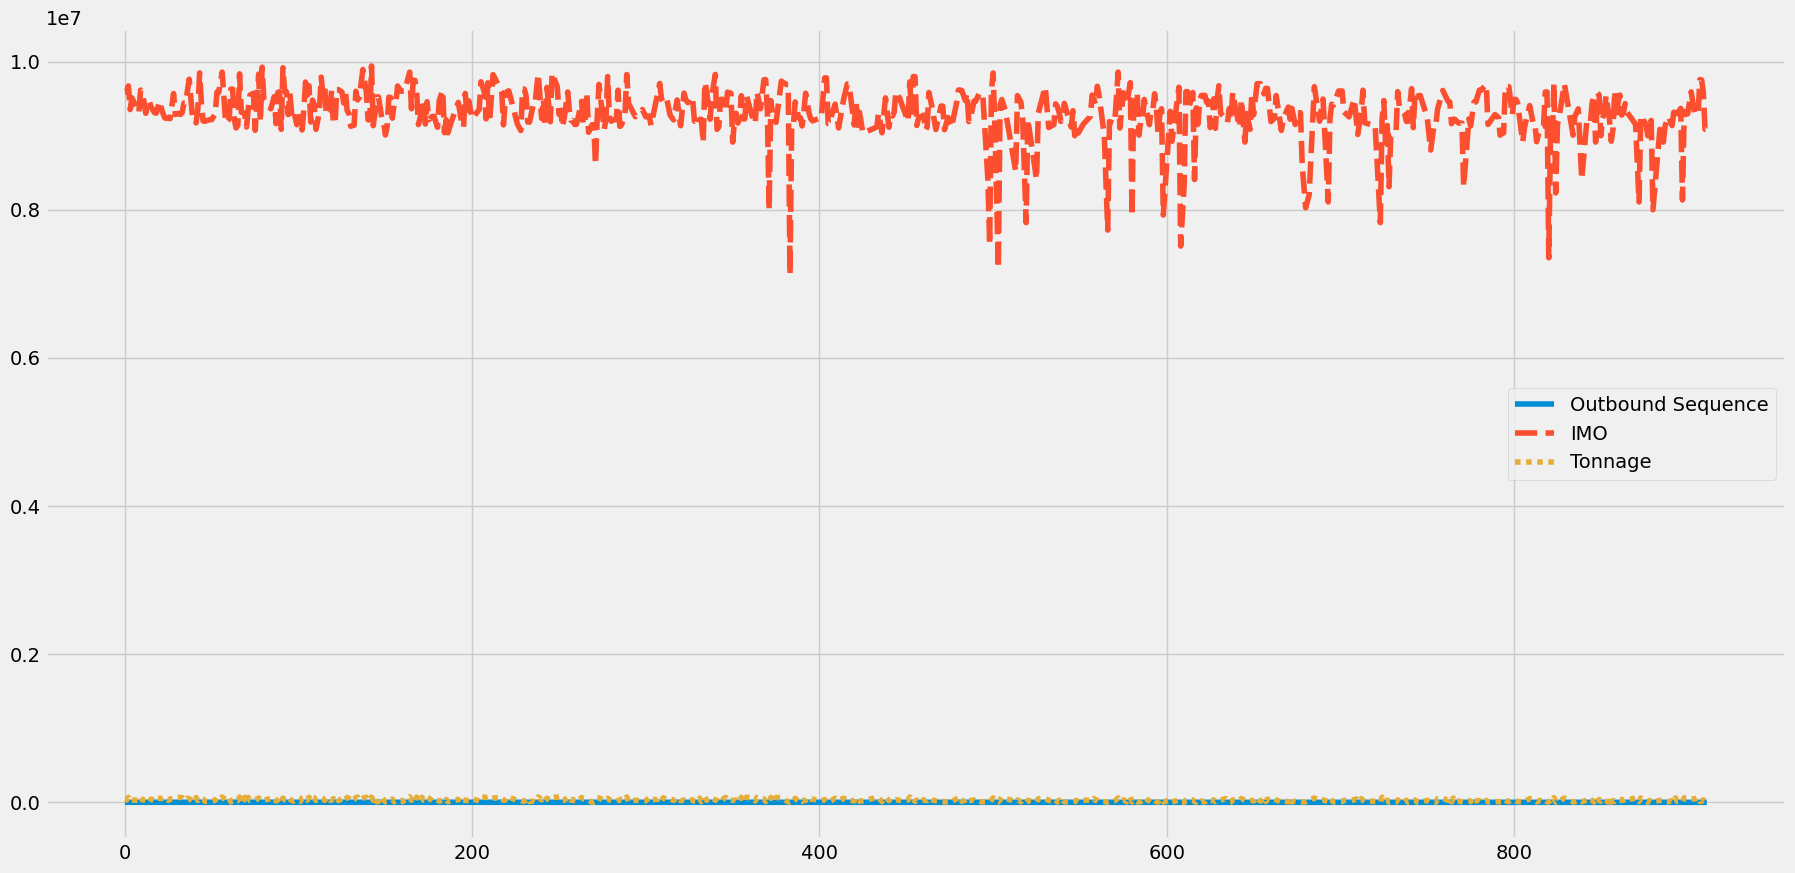

In [11]:
# Plot
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_)
# plt.legend(loc='lower left', bbox_to_anchor=(0, -0.3), ncol=3)
plt.show()


In [9]:
# According to the data's "income group," what proportion of the grain are low-income countries receiving?
df_dest_country_low_income = (
    pd.pivot_table(
        df_,
        values="Tonnage",
        columns=["Income group", "Commodity"],
        aggfunc="sum",
    )
    .stack()[["low-income"]]
)

df_dest_country_low_income.assign(perc_grain=df_dest_country_low_income["low-income"] / df["Tonnage"].sum())



Income group       low-income  perc_grain
        Commodity                        
Tonnage Barley            NaN         NaN
        Corn              NaN         NaN
        Wheat        604786.0    0.026186

In [10]:
# Have we seen growth in the total tonnage shipped each month to developing countries? lower-middle income and	upper-middle-income
agg_func = ("Tonnage", "sum")
df_target = df_.groupby(by=["Departure", "Income group"]).agg(total = ("Tonnage", "sum")).reset_index()
df_target["Departure"] = df_target["Departure"].dt.date
target_income = ["lower-middle income", "upper-middle-income"]
df_target = df_target.loc[df_target["Income group"].isin(target_income)]
df_target

,Departure,Income group,total
0,2022-07-31,lower-middle income,25000.0
1,2022-07-31,upper-middle-income,1527.0
3,2022-08-04,upper-middle-income,12000.0
4,2022-08-06,lower-middle income,66084.0
5,2022-08-06,upper-middle-income,44000.0
...,...,...,...
340,2023-02-28,upper-middle-income,113502.0
342,2023-03-01,upper-middle-income,65650.0
343,2023-03-02,upper-middle-income,64867.0
344,2023-03-03,lower-middle income,49550.0


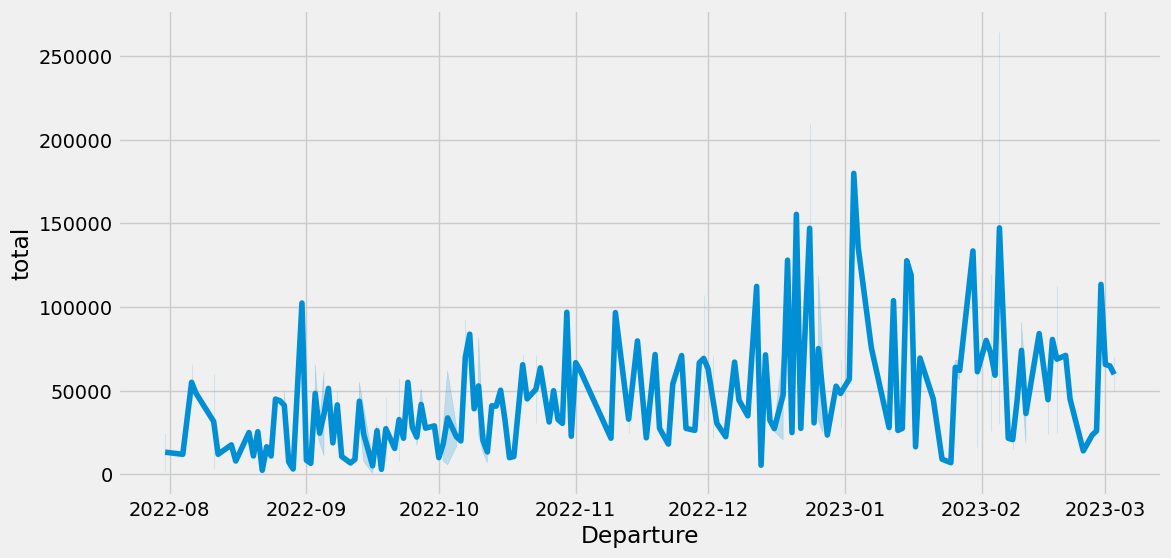

In [11]:
# Have we seen growth in the total tonnage shipped each month to developing countries? lower-middle income and	upper-middle-income
# import
import seaborn as sns
import matplotlib.pyplot as plt
# set style
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=df_target, 
            x=df_target["Departure"], 
            y=df_target["total"])

plt.show()

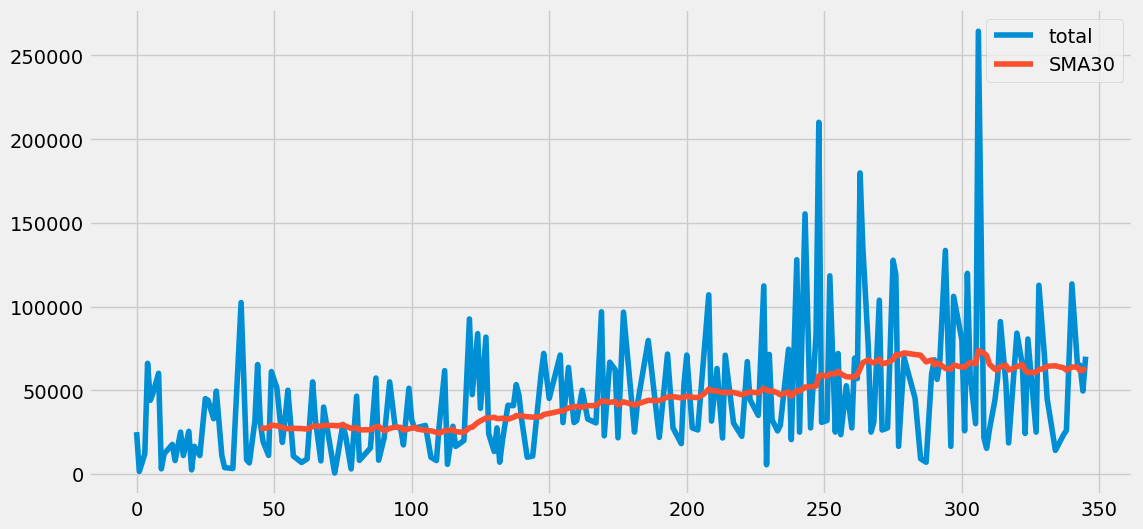

In [27]:
df_ma = df_target.assign(SMA30=df_target["total"].rolling(30).mean())
df_ma

# Plot
df_ma[["total", "SMA30"]].plot(label="test", figsize=(12,6))
plt.show()

In [ ]:
df_.head()

,Status,Outbound Sequence,Vessel name,IMO,Departure port,Country,Commodity,Tonnage,Departure,Inspection İstanbul,Income group,Flag,World Bank region,UN region,Development category
0,Outbound,784,PROFESSOR WENGER,9235969,Odesa,Libya,Corn,25000.0,2023-03-03 22:00:00,NaT,upper-middle-income,Niue,Middle East & North Africa,Africa,developing
1,Outbound,783,MAHA ROOS,9231004,Yuzhny/Pivdennyi,China,Corn,45080.0,2023-03-03 22:00:00,NaT,upper-middle-income,India,East Asia & Pacific,Asia-Pacific,developing
3,Outbound,782,AVRA I,9569932,Odesa,Kenya,Wheat,49550.0,2023-03-03 22:00:00,NaT,lower-middle income,Greece,Sub-Saharan Africa,Africa,developing
4,Outbound,781,THE STRONG,9287455,Odesa,China,Corn,64867.0,2023-03-02 22:00:00,NaT,upper-middle-income,Panama,East Asia & Pacific,Asia-Pacific,developing
6,Outbound,779,MIM VANGELIS JR.,9302782,Yuzhny/Pivdennyi,Portugal,Corn,65394.0,2023-03-01 22:00:00,NaT,high-income,Liberia,Europe & Central Asia,Western Europe and Others,developed


In [ ]:
#  what 10 flags are most commonly used on the ships coming from Ukraine? 
# Do any country's names appear more than once? If so, why, and how can you fix it?...

df_[["Country", "Flag"]].value_counts()

Country      Flag        
Spain        Panama          20
Türkiye      Liberia         20
Spain        Liberia         18
Türkiye      Palau           18
China        Liberia         17
                             ..
Greece       Comoros          1
Portugal     Malta            1
Greece       Liberia          1
Portugal     Cook Islands     1
Afghanistan  Barbados         1
Length: 210, dtype: int64

In [ ]:
df_[["Flag"]].value_counts()

Flag                          
Liberia                           110
Panama                            100
Marshall Islands                   55
Barbados                           50
Malta                              43
Marshall Islands                   35
Palau                              31
Belize                             25
Türkiye                            22
Comoros                            20
Bahamas                            16
Cook Islands                       13
St. Vincent and the Grenadines     13
Vanuatu                            10
Togo                               10
Sierra Leone                        6
Greece                              5
Hong Kong                           5
St. Kitts and Nevis                 4
Singapore                           3
India                               3
Tuvalu                              3
Turkiye                             3
Tanzania                            3
St. Vincent                         2
Lebanon            